# Shayan Amin

# Assignment 1: NYC Taxi Fare Analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
filename_data = 'data/nyc_fare.csv'

In [19]:
data = pd.read_csv(filename_data, parse_dates = ['pickup_datetime'])

In [68]:
data.head(len(data))

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...
846940,9F29B1D177C67F2731E69EAA85D49367,5500334F780132AC7D883F01F869212E,CMT,2013-12-31 23:51:41,CRD,7.0,0.5,0.5,1.6,0.0,9.6
846941,C76AB9E3B27A5CC4F7087CFB109F51AE,6B8BA824723DE0DAB63B980B1DC843CE,CMT,2013-12-31 23:54:00,CSH,28.0,0.5,0.5,0.0,0.0,29.0
846942,D87EB3AD2ED303B3D92E37D871B2C2E9,F578F0435B49B3D7B9A7AAFC663A82CD,VTS,2013-12-31 23:59:00,CSH,8.5,0.5,0.5,0.0,0.0,9.5
846943,F74743D90F84644B1FA4576F4A82A8A3,537121DB04EC62BADFA44D8F03755A64,VTS,2013-12-31 23:59:00,CRD,7.5,0.5,0.5,1.0,0.0,9.5


In [70]:
data.fare_amount.max()

620.01

In [56]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [21]:
data.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,846945.000000,846945.000000,846945.000000,846945.00000,846945.000000,846945.000000
mean,12.190578,0.320303,0.499305,1.34466,0.232142,14.587073
std,9.514150,0.772642,0.057844,2.09149,1.109164,11.380950
min,-648.420000,-1.000000,-0.500000,0.00000,0.000000,-52.500000
25%,6.500000,0.000000,0.500000,0.00000,0.000000,8.000000
50%,9.500000,0.000000,0.500000,1.00000,0.000000,11.000000
75%,14.000000,0.500000,0.500000,2.00000,0.000000,16.500000
max,620.010000,628.840000,41.490000,200.00000,100.660000,620.010000


In [22]:
p_fare = data.fare_amount
p_fare.head()

0     5.0
1    13.5
2     7.5
3     2.5
4     6.5
Name: fare_amount, dtype: float64

In [23]:
p_tamt = data.tip_amount        

In [24]:
p_tamt.head()

0    0.0
1    2.8
2    0.0
3    0.0
4    0.0
Name: tip_amount, dtype: float64

In [63]:
def tip_fare_pxl(tip, fare):
    tip_rad = (tip *np.pi)/180.0
    tip_rad = np.log(np.tan((tip_rad+np.pi/2.0)/2.0))
    x = 100*(fare + 180.0)/360.0
    y = 100*(tip_rad - np.pi) / (2.0 * np.pi)
    return (x,y)

In [64]:
pa, pb = tip_fare_pxl(p_tamt,p_fare)
type(pb)

pandas.core.series.Series

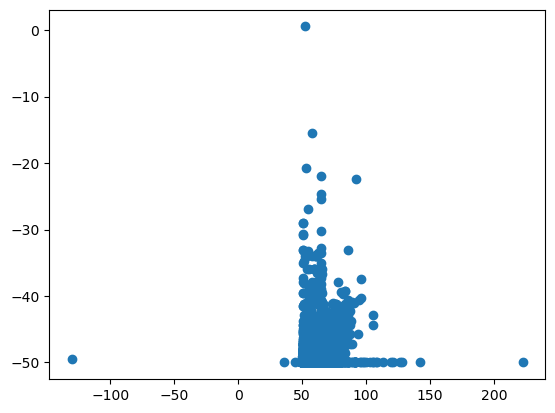

In [65]:
plt.scatter(pa,pb)

### The fare amounts that drivers receive are ranging from 2.50 to 7.50 and those don't include the tip.
### However the fare amount that a driver receives of 13.50  along with a tip of $2.80 is an outlier.

In [28]:
len(data)

846945

In [29]:
data.fare_amount.min()

-648.42

In [30]:
data.fare_amount.max()

620.01

In [90]:
fare_arr = np.linspace(start = 0., stop = 620.01, num = 20)

In [98]:
fare_arr.round()

array([  0.,  33.,  65.,  98., 131., 163., 196., 228., 261., 294., 326.,
       359., 392., 424., 457., 489., 522., 555., 587., 620.])

<Axes: >

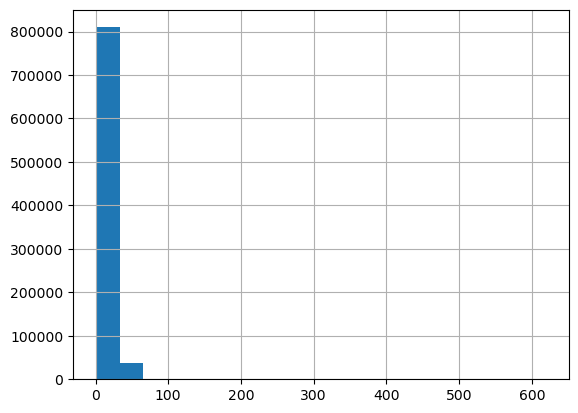

In [97]:
data.fare_amount.hist(bins = fare_arr)

In [34]:
data.fare_amount.head()

0     5.0
1    13.5
2     7.5
3     2.5
4     6.5
Name: fare_amount, dtype: float64

### Most fares fall under the range of 620 dollars. the most common fare price is 33 dollars.

In [89]:
data.loc[data.fare_amount > 500]

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
540759,AC7A85219867AB060609BA214C124969,8FB6EB354A3D5986F098EEC2642D1340,CMT,2013-08-21 00:11:07,DIS,620.01,0.0,0.0,0.0,0.0,620.01


In [105]:
from ipywidgets import interact
@interact
def show_tip_rcrds(trip_lim = (0, 100)):
    return len(data.loc[data.tip_amount > trip_lim])

interactive(children=(IntSlider(value=50, description='trip_lim'), Output()), _dom_classes=('widget-interact',…

### There are 4 trips in where the tip amount is greater than 100 dollars.